<a href="https://colab.research.google.com/github/AniketJoshi111/BEProject_MachineUnlearning/blob/main/BE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a machine unlearning model for malicious PDF detection using the "pdf_jsdata.csv" dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/pdf_jsdata.csv')
display(df.head())
display(df.info())

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Malicious
0,50,50,16,16,2,2,2,3,0,0,...,0,0,0,0,0,0,0,0,0,no
1,9,9,2,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
2,9,9,3,3,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,15,15,2,2,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,yes
4,8,8,2,2,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   obj           499 non-null    int64 
 1   endobj        499 non-null    int64 
 2   stream        499 non-null    int64 
 3   endstream     499 non-null    int64 
 4   xref          499 non-null    int64 
 5   trailer       499 non-null    int64 
 6   startxref     499 non-null    int64 
 7   Page          499 non-null    int64 
 8   Encrypt       499 non-null    int64 
 9   ObjStm        499 non-null    int64 
 10  JS            499 non-null    int64 
 11  Javascript    499 non-null    int64 
 12  AA            499 non-null    int64 
 13  OpenAction    499 non-null    int64 
 14  AcroForm      499 non-null    int64 
 15  JBIG2Decode   499 non-null    int64 
 16  RichMedia     499 non-null    int64 
 17  Launch        499 non-null    int64 
 18  EmbeddedFile  499 non-null    int64 
 19  XFA     

None

In [ ]:
display(df.describe())
display(df['Malicious'].value_counts())

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000,499.000000
mean,51.845691,51.819639,16.825651,16.819639,1.220441,1.292585,1.422846,3.629259,0.006012,1.432866,...,0.799599,0.058116,0.398798,0.308617,0.026052,0.0,0.002004,0.629259,0.044088,0.002004
std,110.384315,110.394180,37.130234,37.132828,1.037211,0.983072,0.830855,8.844304,0.100020,4.832226,...,1.180463,0.532695,0.490142,0.588499,0.496294,0.0,0.044766,2.178949,0.205497,0.044766
min,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,11.000000,11.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,41.000000,41.000000,17.000000,17.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1193.000000,1193.000000,470.000000,470.000000,16.000000,16.000000,9.000000,139.000000,2.000000,47.000000,...,16.000000,9.000000,1.000000,3.000000,11.000000,0.0,1.000000,11.000000,1.000000,1.000000


,count
Malicious,
yes,270
no,229


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('Malicious', axis=1)
y = df['Malicious']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

display(X_train.head())
display(y_train[:5])
display(X_test.head())
display(y_test[:5])

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
243,35,35,11,11,2,2,2,1,0,0,...,1,1,0,1,0,0,0,0,0,0
17,8,8,2,2,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
434,14,14,6,6,1,1,1,1,0,0,...,4,0,0,0,0,0,0,0,0,0
116,8,8,2,2,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
404,9,9,3,3,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0


array([1, 1, 1, 1, 1])

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
149,9,9,3,3,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
497,9,9,2,2,0,1,0,1,0,0,...,3,0,0,0,0,0,0,0,0,0
147,8,8,2,2,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
411,6,6,2,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
348,95,95,22,22,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


array([1, 1, 1, 0, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.9800
Precision: 0.9815
Recall: 0.9815
F1-score: 0.9815


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Copy clean training data
X_train_poisoned = X_train.copy()
y_train_poisoned = y_train.copy()

# Poison a small fraction of the data (e.g., 5%)
poison_fraction = 0.25
num_poison = int(len(X_train_poisoned) * poison_fraction)

# Randomly select indices to poison
# Use np.arange for indexing numpy arrays
poison_indices = np.random.choice(np.arange(len(y_train_poisoned)), size=num_poison, replace=False)

# Flip their labels (0→1, 1→0)
y_train_poisoned[poison_indices] = 1 - y_train_poisoned[poison_indices]

print(f"   Injected {num_poison} poisoned (mislabeled) samples into training data.")

# Train a "Compromised Model" on poisoned data
compromised_model = RandomForestClassifier(random_state=42)
compromised_model.fit(X_train_poisoned, y_train_poisoned)

# Evaluate compromised model
y_pred_compromised = compromised_model.predict(X_test)

accuracy_compromised = accuracy_score(y_test, y_pred_compromised)
precision_compromised = precision_score(y_test, y_pred_compromised)
recall_compromised = recall_score(y_test, y_pred_compromised)
f1_compromised = f1_score(y_test, y_pred_compromised)

print("\n   Performance Metrics v2 (After Poisoning - Accuracy Drops):")
print(f"Accuracy : {accuracy_compromised:.4f}")
print(f"Precision: {precision_compromised:.4f}")
print(f"Recall   : {recall_compromised:.4f}")
print(f"F1-score : {f1_compromised:.4f}")

   Injected 99 poisoned (mislabeled) samples into training data.

   Performance Metrics v2 (After Poisoning - Accuracy Drops):
Accuracy : 0.9000
Precision: 0.8548
Recall   : 0.9815
F1-score : 0.9138


In [ ]:
# ================================
# 🧠 SISA (Sharded, Isolated, Sliced, Aggregated) Training with tqdm
# ================================
import numpy as np
import joblib
import os
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# ---------- CONFIGURATION ----------
NUM_SHARDS = 5
NUM_SLICES = 3
MODEL_PATH = "sisa_models"
os.makedirs(MODEL_PATH, exist_ok=True)

# ---------- STEP 1: SHARD DATA ----------
def shard_dataset(X, y, num_shards=NUM_SHARDS):
    shard_size = len(X) // num_shards
    shards = []
    for i in range(num_shards):
        start = i * shard_size
        end = (i + 1) * shard_size if i < num_shards - 1 else len(X)
        shards.append((X.iloc[start:end], y[start:end]))
    return shards

# ⚠️ Use poisoned data for SISA training
shards = shard_dataset(X_train_poisoned, y_train_poisoned, NUM_SHARDS)
print(f"✅ Created {NUM_SHARDS} shards from poisoned dataset (~{len(X_train_poisoned)//NUM_SHARDS} samples each).")

# ---------- STEP 2: SLICE & TRAIN ----------
def slice_and_train(X_shard, y_shard, shard_id, num_slices=NUM_SLICES):
    slice_size = len(X_shard) // num_slices
    model = RandomForestClassifier(random_state=42)
    for s in tqdm(range(num_slices), desc=f"Training Shard {shard_id}", leave=False):
        start = s * slice_size
        end = (s + 1) * slice_size if s < num_slices - 1 else len(X_shard)
        X_slice, y_slice = X_shard.iloc[start:end], y_shard[start:end]
        model.fit(X_slice, y_slice)
        joblib.dump(model, f"{MODEL_PATH}/shard{shard_id}_slice{s}.pkl")
    return model

models = []
print("\n⚙️ Training SISA shard models on poisoned data...\n")
for shard_id, (X_s, y_s) in enumerate(tqdm(shards, desc="Shards", position=0)):
    model = slice_and_train(X_s, y_s, shard_id)
    models.append(model)

print("\n✅ All poisoned shard models trained and saved.\n")

# ---------- STEP 3: AGGREGATE PREDICTIONS ----------
def sisa_predict(X, models):
    print("\U0001f50d Aggregating predictions across shards...")
    all_probs = [m.predict_proba(X) for m in tqdm(models, desc="Aggregating")]
    avg_probs = np.mean(all_probs, axis=0)
    return np.argmax(avg_probs, axis=1)

y_pred_sisa = sisa_predict(X_test, models)

accuracy_sisa = accuracy_score(y_test, y_pred_sisa)
precision_sisa = precision_score(y_test, y_pred_sisa)
recall_sisa = recall_score(y_test, y_pred_sisa)
f1_sisa = f1_score(y_test, y_pred_sisa)

print("\n📊 SISA Model Performance (Before Unlearning - Trained on Poisoned Data):")
print(f"Accuracy : {accuracy_sisa:.4f}")
print(f"Precision: {precision_sisa:.4f}")
print(f"Recall   : {recall_sisa:.4f}")
print(f"F1-score : {f1_sisa:.4f}")

# ---------- STEP 4: UNLEARNING ----------
def unlearn_samples(X_to_forget, y_to_forget, X_train_full, y_train_full, num_slices=NUM_SLICES):
    global models
    total_len = len(X_train_full)
    shard_size = total_len // NUM_SHARDS
    # Note: forget_indices should contain the *original index labels* of the samples to forget
    # If forget_subset is already created using iloc, then forget_subset.index contains
    # the original labels. If poison_indices were meant to be positions, this should be X_train_full.iloc[poison_indices].index
    # Given poison_indices are positional, and forget_subset is constructed from them:
    # forget_indices will contain the original dataframe index values if X_train_poisoned.iloc was used.
    # Let's assume forget_subset.index holds the *actual* labels to forget for now.

    # This part needs careful handling if the index of shards is not reset.
    # The mask should operate on the index of X_shard, not on its length or iloc.

    print("\n💣 Starting unlearning procedure...\n")
    for idx in tqdm(X_to_forget.index, desc="Forgetting Samples (by original index)"):
        # Find which shard this original index belongs to.
        # This assumes X_train_full also retains original indices for this mapping.
        try:
            original_pos = X_train_full.index.get_loc(idx)
        except KeyError:
            # This sample might not be in the current X_train_full (e.g., if it was already removed)
            # Or if X_train_full's index was reset.
            # For simplicity, if we rely on X_train_full and shards retaining original indices
            continue # Skip if not found, or handle as an error.

        shard_id = min(original_pos // shard_size, NUM_SHARDS - 1)
        X_shard_current, y_shard_current = shards[shard_id]

        # Create a mask to remove the sample with the specific original index `idx`
        mask = X_shard_current.index != idx
        X_shard_new, y_shard_new = X_shard_current.loc[mask], y_shard_current[mask] # Removed .values from mask

        # Retrain the affected shard
        model = slice_and_train(X_shard_new, y_shard_new, shard_id, num_slices)
        models[shard_id] = model
        shards[shard_id] = (X_shard_new, y_shard_new)
    print("\n✅ Unlearning completed. Only affected shards retrained.\n")

# Fix: Use .iloc for positional indexing when selecting `forget_subset` and `forget_labels`
# poison_indices are 0-based positions relative to the current X_train_poisoned/y_train_poisoned
forget_subset = X_train_poisoned.iloc[poison_indices]
forget_labels = y_train_poisoned[poison_indices]
unlearn_samples(forget_subset, forget_labels, X_train_poisoned, y_train_poisoned)

# ---------- STEP 5: RE-EVALUATE ----------
y_pred_after_unlearn = sisa_predict(X_test, models)
accuracy_unlearned = accuracy_score(y_test, y_pred_after_unlearn)
precision_unlearned = precision_score(y_test, y_pred_after_unlearn)
recall_unlearned = recall_score(y_test, y_pred_after_unlearn)
f1_unlearned = f1_score(y_test, y_pred_after_unlearn)

print("\n📈 Performance Metrics v3 (Post-Unlearning - Recovered):")
print(f"Accuracy : {accuracy_unlearned:.4f}")
print(f"Precision: {precision_unlearned:.4f}")
print(f"Recall   : {recall_unlearned:.4f}")
print(f"F1-score : {f1_unlearned:.4f}")

# ---------- STEP 6: COMPARISON ----------
print("\n🧩 Comparison Summary")
print("-" * 40)
print(f"Baseline (Clean) Accuracy : {accuracy:.4f}")
print(f"Compromised (Poisoned)    : {accuracy_compromised:.4f}")
print(f"SISA After Unlearning     : {accuracy_unlearned:.4f}")
print("-" * 40)


✅ Created 5 shards from poisoned dataset (~79 samples each).

⚙️ Training SISA shard models on poisoned data...



Shards:   0%|          | 0/5 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]


✅ All poisoned shard models trained and saved.

🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]


📊 SISA Model Performance (Before Unlearning - Trained on Poisoned Data):
Accuracy : 0.9600
Precision: 0.9464
Recall   : 0.9815
F1-score : 0.9636

💣 Starting unlearning procedure...



Forgetting Samples (by original index):   0%|          | 0/99 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]


✅ Unlearning completed. Only affected shards retrained.

🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]


📈 Performance Metrics v3 (Post-Unlearning - Recovered):
Accuracy : 0.8900
Precision: 0.8413
Recall   : 0.9815
F1-score : 0.9060

🧩 Comparison Summary
----------------------------------------
Baseline (Clean) Accuracy : 0.9800
Compromised (Poisoned)    : 0.9000
SISA After Unlearning     : 0.8900
----------------------------------------


/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)


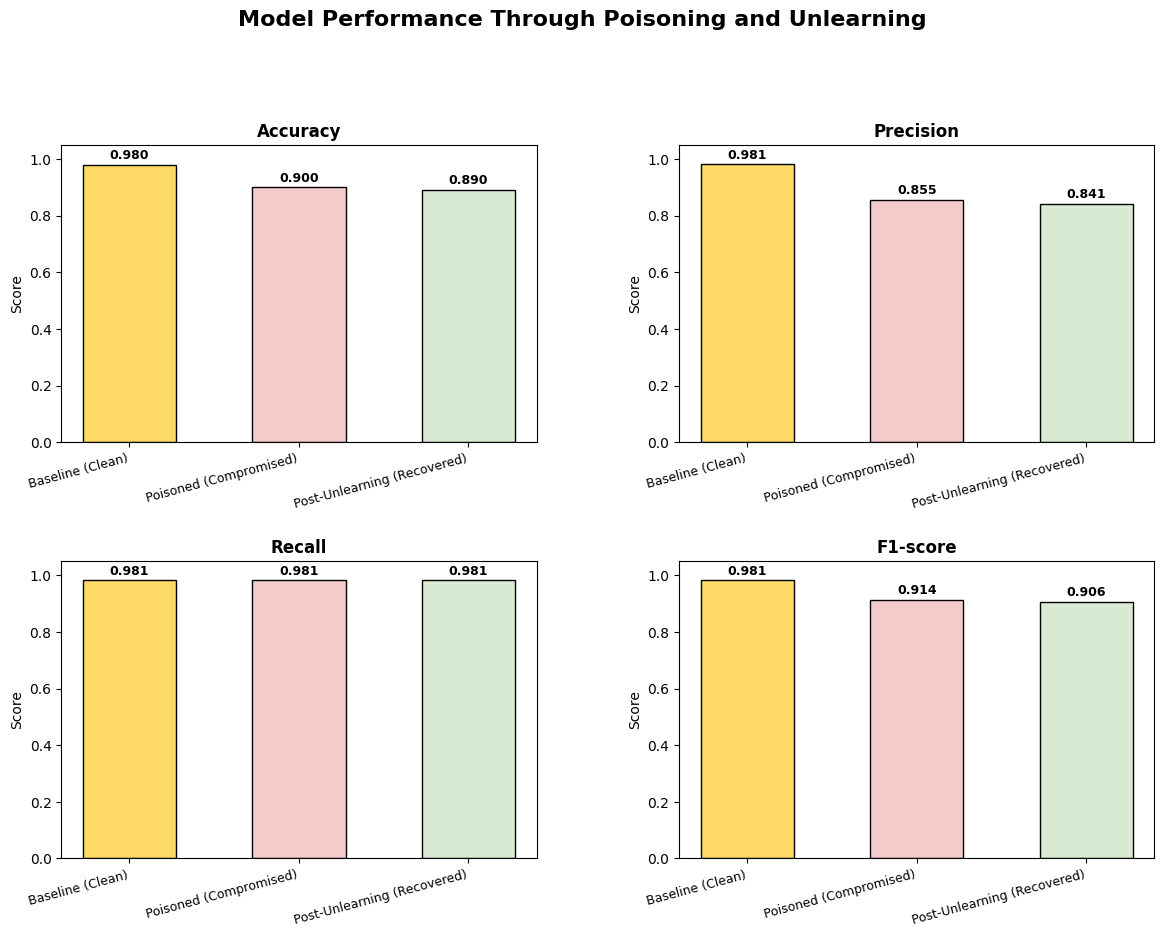

In [ ]:
# ================================
# 📊 Visualization: Model Performance Across Phases (Fixed Labels)
# ================================
import matplotlib.pyplot as plt

# Data setup
metrics_labels = ["Baseline (Clean)", "Poisoned (Compromised)", "Post-Unlearning (Recovered)"]
accuracy_values = [accuracy, accuracy_compromised, accuracy_unlearned]
precision_values = [precision, precision_compromised, precision_unlearned]
recall_values = [recall, recall_compromised, recall_unlearned]
f1_values = [f1, f1_compromised, f1_unlearned]

fig, ax = plt.subplots(2, 2, figsize=(12, 9))  # slightly wider
ax = ax.flatten()

metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]
metric_values = [accuracy_values, precision_values, recall_values, f1_values]
colors = ["#FFD966", "#F4CCCC", "#D9EAD3"]  # Yellow = Baseline, Pink = Poisoned, Green = Recovered

for i in range(4):
    bars = ax[i].bar(metrics_labels, metric_values[i], color=colors, edgecolor="black", width=0.55)
    ax[i].set_title(metric_names[i], fontsize=12, fontweight="bold")
    ax[i].set_ylim(0, 1.05)
    ax[i].set_ylabel("Score", fontsize=10)

    # Rotate labels for readability
    ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)

    # Add value labels above bars
    for bar, v in zip(bars, metric_values[i]):
        ax[i].text(bar.get_x() + bar.get_width()/2, v + 0.01, f"{v:.3f}",
                   ha="center", va="bottom", fontsize=9, fontweight="bold")

# Adjust layout & title
plt.tight_layout(pad=2)
plt.suptitle("Model Performance Through Poisoning and Unlearning", fontsize=16, fontweight="bold", y=1.05)
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
plt.show()


In [ ]:
# forget_subset is what you used to unlearn
print("Forgotten indices:", list(forget_subset.index))
# Check presence in shards before/after
for sid, (X_s, y_s) in enumerate(shards):
    present = set(X_s.index) & set(forget_subset.index)
    print(f"Shard {sid} now contains {len(present)} of forgotten indices: {sorted(list(present))}")


Forgotten indices: [129, 481, 392, 65, 273, 125, 236, 320, 423, 157, 309, 356, 427, 244, 93, 69, 83, 334, 111, 394, 382, 90, 27, 151, 319, 153, 397, 485, 256, 399, 185, 299, 410, 108, 413, 264, 61, 281, 123, 351, 116, 184, 294, 465, 18, 231, 280, 182, 321, 403, 284, 338, 391, 214, 493, 75, 296, 224, 183, 187, 325, 56, 445, 91, 441, 26, 172, 207, 42, 260, 257, 48, 152, 21, 165, 60, 443, 162, 415, 104, 41, 276, 218, 367, 228, 301, 40, 419, 487, 451, 401, 143, 268, 190, 371, 196, 127, 457, 390]
Shard 0 now contains 0 of forgotten indices: []
Shard 1 now contains 0 of forgotten indices: []
Shard 2 now contains 0 of forgotten indices: []
Shard 3 now contains 0 of forgotten indices: []
Shard 4 now contains 0 of forgotten indices: []


In [ ]:
# load models saved before unlearning? If you didn't keep previous models, re-run training and save copy
# Here we compare current SISA model predictions to a full-retrain baseline you already have.

# Predictions from baseline full model:
pred_baseline_on_forgotten = model.predict(forget_subset)  # model = baseline RandomForest variable in notebook
# Predictions from SISA after unlearning:
pred_sisa_after = sisa_predict(forget_subset, models)

print("Baseline preds on forgotten:", pred_baseline_on_forgotten)
print("SISA-after preds on forgotten:", pred_sisa_after)
# Count changes
changes = sum(pred_baseline_on_forgotten != pred_sisa_after)
print(f"Number of changed predictions for forgotten samples: {changes}/{len(forget_subset)}")


🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]

Baseline preds on forgotten: [0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1]
SISA-after preds on forgotten: [0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1]
Number of changed predictions for forgotten samples: 2/19


In [ ]:
# compare test predictions before and after unlearning
y_pred_before = y_pred_sisa  # stored earlier (before unlearning)
y_pred_after = y_pred_after_unlearn

# how many test samples changed label?
changed_test = (y_pred_before != y_pred_after).sum()
print("Test samples with changed predictions after unlearning:", changed_test, "out of", len(X_test))

# If changed_test is 0 or tiny, the unlearning had negligible effect on test set.


Test samples with changed predictions after unlearning: 0 out of 100
